In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("balanced.csv", usecols=["content", "score"])

data

,content,score
0,if you can have spotify premium this app is a ...,positive
1,annoying algorithm that replays the things i u...,positive
2,so where do i start well spotify was the last ...,positive
3,spotify is trash it is usually really good but...,neutral
4,cannot shuffle anymore? you can tap the button...,positive
...,...,...
146713,i must have used spotify for almost three or f...,neutral
146714,it is a fantastic new app but i cannot seem to...,neutral
146715,i loved this app but. in the last month or so ...,neutral
146716,stop forcing on me to listen to the same 20 so...,neutral


In [2]:
print(data["score"].value_counts())
print(data)

score
positive    48906
neutral     48906
negative    48906
Name: count, dtype: int64
                                                  content     score
0       if you can have spotify premium this app is a ...  positive
1       annoying algorithm that replays the things i u...  positive
2       so where do i start well spotify was the last ...  positive
3       spotify is trash it is usually really good but...   neutral
4       cannot shuffle anymore? you can tap the button...  positive
...                                                   ...       ...
146713  i must have used spotify for almost three or f...   neutral
146714  it is a fantastic new app but i cannot seem to...   neutral
146715  i loved this app but. in the last month or so ...   neutral
146716  stop forcing on me to listen to the same 20 so...   neutral
146717  i listen to spotify everyday. i still do not e...   neutral

[146718 rows x 2 columns]


In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from tqdm import tqdm

In [4]:
tqdm.pandas()  # Enables progress_apply()

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Prepare stopword list
stop_words = set(stopwords.words('english'))
sentiment_keepers = {'not', 'no', 'nor', 'very', 'never', 'barely', 'hardly', 'scarcely'}
filtered_stopwords = stop_words - sentiment_keepers

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Text cleaning + lemmatization function# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Updated cleaning and lemmatization function
def clean_and_lemmatize(text):
    words = word_tokenize(str(text).lower())
    pos_tags = pos_tag(words)
    filtered = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
        if word.isalpha() and word not in filtered_stopwords
    ]
    return " ".join(filtered)

# Apply function with progress bar
data['content'] = data['content'].progress_apply(clean_and_lemmatize)

# Show result
data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abcjv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abcjv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abcjv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abcjv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|██████████| 146718/146718 [06:33<00:00, 372.98it/s]


,content,score
0,spotify premium app phenomenal app free versio...,positive
1,annoy algorithm replay thing use enjoy hardly ...,positive
2,start well spotify last musical platform add m...,positive
3,spotify trash usually really good not know not...,neutral
4,not shuffle anymore tap button come sec go happen,positive


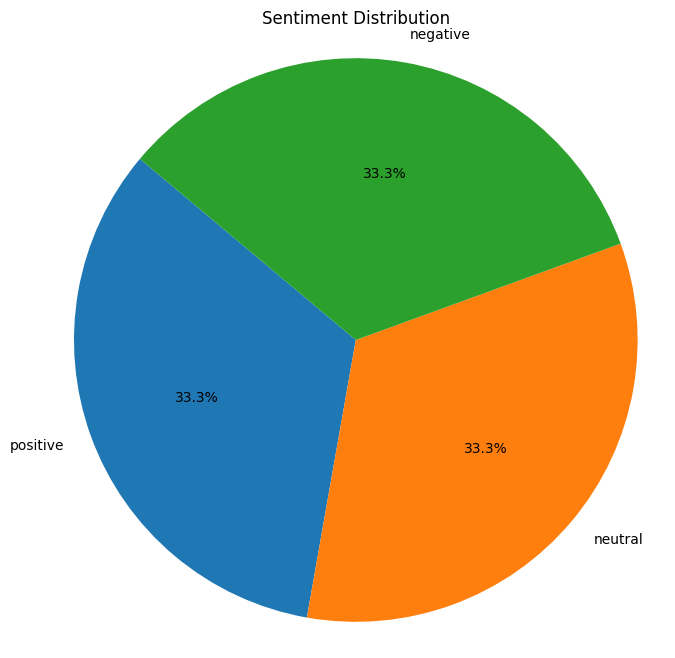

In [5]:
from matplotlib import pyplot as plt
import numpy as np

# Count the number of occurrences for each sentiment category
sentiment_count = data['score'].value_counts()

plt.figure(figsize=(8, 8))  # Set the figure size

# Create a pie chart to visualize sentiment distribution
plt.pie(sentiment_count, labels=sentiment_count.index, autopct="%1.1f%%", startangle=140)

plt.title('Sentiment Distribution')  # Add a title to the chart
plt.axis('equal')  # Ensure the pie chart is displayed as a circle
plt.show()  # Display the plot

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaNs in the content column
data['content'] = data['content'].fillna('')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['content'], data['score'], test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=20, max_df=0.7, sublinear_tf=True)

# Fit and transform
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [7]:
print(data["score"].value_counts())
data

score
positive    48906
neutral     48906
negative    48906
Name: count, dtype: int64


,content,score
0,spotify premium app phenomenal app free versio...,positive
1,annoy algorithm replay thing use enjoy hardly ...,positive
2,start well spotify last musical platform add m...,positive
3,spotify trash usually really good not know not...,neutral
4,not shuffle anymore tap button come sec go happen,positive
...,...,...
146713,must use spotify almost three four year oh dea...,neutral
146714,fantastic new app not seem able fully update v...,neutral
146715,love app last month notice music stop no reaso...,neutral
146716,stop forcing listen songsi like tap new thing ...,neutral


In [8]:
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train_vectorized, y_train)
preds = rf.predict(X_test_vectorized)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      9759
     neutral       0.91      0.95      0.93      9880
    positive       0.91      0.90      0.91      9705

    accuracy                           0.91     29344
   macro avg       0.91      0.91      0.91     29344
weighted avg       0.91      0.91      0.91     29344



In [9]:
import joblib

joblib.dump(rf, 'sentiment_model_2.pk1')
joblib.dump(vectorizer, 'tfidvectorizer_2.pk1')

['tfidvectorizer_2.pk1']